#### Obravnava problema nihanja s 2 PS ($x_1(t)$ in $x_2(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [1]:
#! pip install ipynb --upgrade

In [2]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
import funkcije_seminar as f;

#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_13128\1993208459.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


<img src="shema.jpg" width="400">

##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [3]:
t = f.neodvisna_spremenljivka_t(40);

In [4]:
m1 = 40;
k1 = 5000;

m2 = 350;
k2 = 700;

#create matrices M and K of zeroes and add values
M = f.mass_matrix(m1, m2);
K = f.stiffness_matrix(k1, k2);

#print matrices M and K
print('M = ')
print(M)
print('K = ')
print(K)

M = 
[[ 40.   0.]
 [  0. 350.]]
K = 
[[5700. -700.]
 [-700.  700.]]


#### Lastne vrednosti, lastni vektorji

In [5]:
A = np.linalg.inv(M) @ K

#eigenvalues and eigenvectors
eigenval, eigenvec = np.linalg.eig(A)
eigenvalues, eigenvectors = f.eig(eigenval, eigenvec)


eigenvalues
[11.94774749  1.32337818]
[ 1.32337818 11.94774749]
 
eigenvectors
[[ 0.99989906  0.12338504]
 [-0.01420829  0.99235887]]
[[ 0.12338504  0.99989906]
 [ 0.99235887 -0.01420829]]


In [6]:
print(f'{eigenvalues[0]:.3f} rad/s \t=>\t {eigenvectors[:,0]}')
print(f'{eigenvalues[1]:.3f} rad/s \t=>\t {eigenvectors[:,1]}')

1.323 rad/s 	=>	 [0.12338504 0.99235887]
11.948 rad/s 	=>	 [ 0.99989906 -0.01420829]


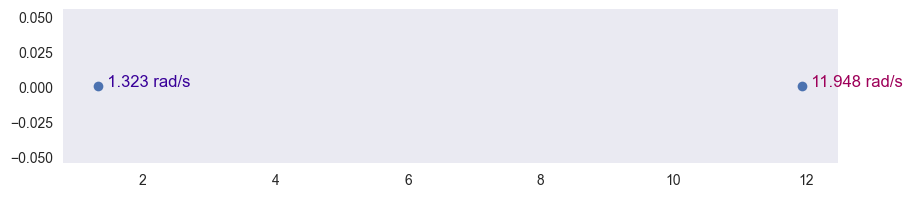

omega1 	 = 1.323 rad/s
omega2 	 = 11.948 rad/s


In [7]:
plt.figure(figsize=(10,2))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {eigenvalues[i]:.3f} rad/s ', fontsize=12, color=colors[i])
#plt.axhline(0, color='k', lw=1, alpha=0.2)
plt.show()

omega1 = eigenvalues[0]
omega2 = eigenvalues[1]

print(f'omega1 \t = {omega1:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s')

C:\Users\marko\AppData\Local\Temp\ipykernel_13128\3423461170.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


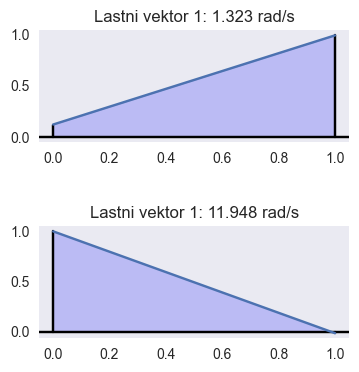

In [8]:
plt.figure(figsize=(4,4))
plt.title("Lastni vektorji")

plt.subplot(2,1,1)
plt.title(f'Lastni vektor 1: {eigenvalues[0]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k', lw=0.2)
plt.grid()
plt.plot(eigenvectors[:,0])
# add horizontal space
plt.subplots_adjust(hspace=0.75)
plt.subplot(2,1,2)
plt.title(f'Lastni vektor 1: {eigenvalues[1]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
# plt.ylim(0.95, 1.1)
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])


In [9]:
modal_mass_m, modal_stiffness_m = f.modal_mass_stiffness(eigenvectors, M, K)
modal_mass_m, modal_stiffness_m

(array([[345.28060091,   0.        ],
        [  0.        ,  40.06258142]]),
 array([[ 604.70020565,    0.        ],
        [   0.        , 5718.88022227]]))

Preverjanje $\omega_1$ in $\omega_2$

In [10]:
omega11 = np.sqrt(modal_stiffness_m[0,0]/modal_mass_m[0,0])
omega22 = np.sqrt(modal_stiffness_m[1,1]/modal_mass_m[1,1])

print(f'modal stiffness 1 \t = \t{modal_stiffness_m[0,0]:.3f} N/m')
print(f'modal mass 1 \t\t = \t{modal_mass_m[0,0]:.2f} kg')
print(f'omega1 \t\t\t = \t{omega11:.2f} rad/s')
print(" ")
print(f'modal stiffness 2 \t = \t{modal_stiffness_m[1,1]:.3f}')
print(f'modal mass 2 \t\t = \t{modal_mass_m[1,1]:.2f}')
print(f'omega2 \t\t\t = \t{omega22:.2f} rad/s')

modal stiffness 1 	 = 	604.700 N/m
modal mass 1 		 = 	345.28 kg
omega1 			 = 	1.32 rad/s
 
modal stiffness 2 	 = 	5718.880
modal mass 2 		 = 	40.06
omega2 			 = 	11.95 rad/s


In [11]:
print(f'omega1 \t = {omega1:.3f} rad/s   \t\t omega11 \t = {omega11:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s \t\t omega22 \t = {omega22:.3f} rad/s')

omega1 	 = 1.323 rad/s   		 omega11 	 = 1.323 rad/s
omega2 	 = 11.948 rad/s 		 omega22 	 = 11.948 rad/s


In [12]:
C = np.zeros((2))
phi = np.zeros((2))

C1 = 0;
C2 = 0;

C[0] = C1;
C[1] = C2;

phi1 = 0 * np.pi/180;
phi2 = 0 * np.pi/180;

phi[0] = phi1;
phi[1] = phi2;

## Definicija vzbujanja

In [13]:
# y = 0.2 * np.sin(2 * np.pi * 0.1 * t)
# plt.figure(figsize=(3,2))
# plt.plot(t, y)
# plt.xlim(0, 5)
# plt.ylim(-0.1, 0.3)

t0 = 4.00 s


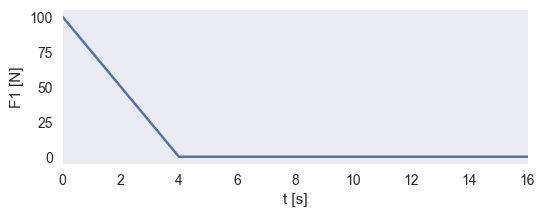

In [14]:
t0 = t[4000]
t0_i = np.argmin(np.abs(t - t0))

print(f't0 = {t0:.2f} s')
F = np.zeros_like(t)
F0 = 100; #N

#F1
F1 = F;
F1[0:t0_i] = F0 * (1 - t[:t0_i]/t0)


plt.figure(figsize=(6,2))
#range axis
plt.xlim(0, 16)
#axis labels
plt.xlabel('t [s]')
plt.ylabel('F1 [N]')
plt.plot(t, F1)
plt.grid()

In [15]:
#create vector Ft with two rows and add F1 to the first row
Ft = np.zeros((2, len(t)))
Ft[0,:] = F1

Pri prehodu v modalne koordinate:
$$leva \ stran = [\Phi] \cdot \{ F(t)\}

In [16]:
Modal_Ft = eigenvectors.T @ Ft
print(Ft[:, :5])
print(Modal_Ft[:, :5])

[[100.     99.975  99.95   99.925  99.9  ]
 [  0.      0.      0.      0.      0.   ]]
[[12.33850398 12.33541935 12.33233472 12.3292501  12.32616547]
 [99.98990571 99.96490824 99.93991076 99.91491328 99.88991581]]


In [17]:
d_krit1 = np.sqrt(k1/m1)
d_krit2 = np.sqrt(k2/m2)
delta1 = 0.15;
delta2 = 0.05;
print(f'delta1 = {delta1:.2f} \t delta1_krit = {d_krit1:.2f}')
print(f'delta2 = {delta2:.2f} \t delta2_krit = {d_krit2:.2f}')

delta1 = 0.15 	 delta1_krit = 11.18
delta2 = 0.05 	 delta2_krit = 1.41


## Konvolucija 1

In [18]:
omega1D = omega1 * np.sqrt(1 - delta1**2)
omega2D = omega2 * np.sqrt(1 - delta2**2)
print(f'omega1 = {omega1:.2f} rad/s')
print(f'omega1D = {omega1D:.2f} rad/s')
print(f'omega2 = {omega2:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')

omega1 = 1.32 rad/s
omega1D = 1.31 rad/s
omega2 = 11.95 rad/s
omega2D = 11.93 rad/s


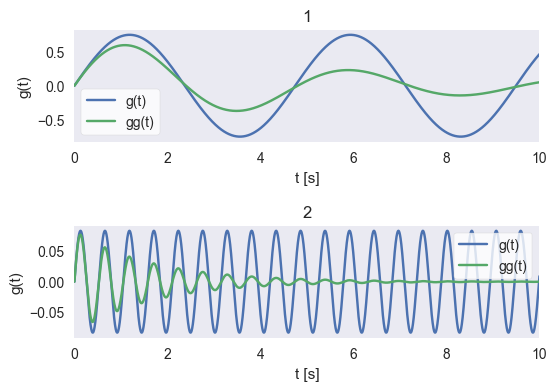

In [29]:
g_func1 = 1/omega1 * np.sin(omega1 * t)
g_func2 = 1/omega2 * np.sin(omega2 * t)

gg_func1 = 1/omega1 * np.exp(-delta1 * omega1 * t) * np.sin(omega1D * t)
gg_func2 = 1/omega2 * np.exp(-delta2 * omega2 * t) * np.sin(omega2D * t)

plot1 = plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title("1")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func1)
plt.plot(t, gg_func1) 
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')
plt.subplot(2,1,2)
#add empty space between subplots
plt.subplots_adjust(hspace=0.75)
plt.title("2")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func2)
plt.plot(t, gg_func2)
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')

### Izračun $\xi_1$ in $\xi_2$ in začetni pogoji

In [30]:
#eta1
eta1 = np.convolve(Modal_Ft[0,:], g_func1) * (t[1] - t[0])
eta1d = np.convolve(Modal_Ft[0,:], gg_func1) * (t[1] - t[0])

#eta2
eta2 = np.convolve(Modal_Ft[1,:], g_func2) * (t[1] - t[0])
eta2d = np.convolve(Modal_Ft[1,:], gg_func2) * (t[1] - t[0])

print(f'size of eta2: {eta2.size}')
print(" ")
print(eta1d[100:110])
print(eta2d[100:110])

size of eta2: 80001
 
[0.06020113 0.06139008 0.06259033 0.06380189 0.06502473 0.06625886
 0.06750425 0.0687609  0.07002881 0.07130796]
[0.42588958 0.43314041 0.44041807 0.44772146 0.4550495  0.46240108
 0.46977509 0.47717044 0.48458602 0.49202072]


In [31]:
#create vector eta with two rows and add eta1 to the first row and eta2 to the second row
eta = np.zeros((2, 2*len(t) - 1))
eta[0,:] = eta1
eta[1,:] = eta2

etaD = np.zeros((2, 2*len(t) - 1))
etaD[0,:] = eta1d
etaD[1,:] = eta2d

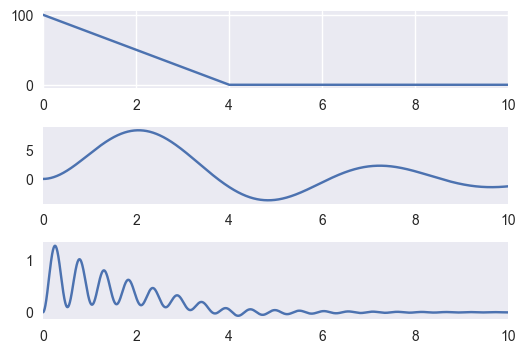

In [32]:
#plot eta1, eta2 
plt.figure(figsize=(6,4))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0])
plt.xlim(0, 10)

plt.subplot(3,1,2)
plt.xlim(0, 10)
# plt.plot(t, eta1[:len(t)])
plt.plot(t, eta1d[:len(t)])
plt.grid()
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,3)
plt.xlim(0, 10)
# plt.plot(t, eta2[:len(t)])
plt.plot(t, eta2d[:len(t)])
plt.grid()

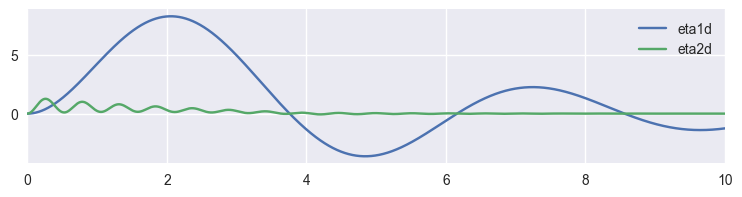

In [33]:
plt.figure(figsize=(9,2))
plt.xlim(0, 10)
plt.plot(t, eta1d[:len(t)], label='eta1d')
plt.plot(t, eta2d[:len(t)], label='eta2d')
plt.legend()

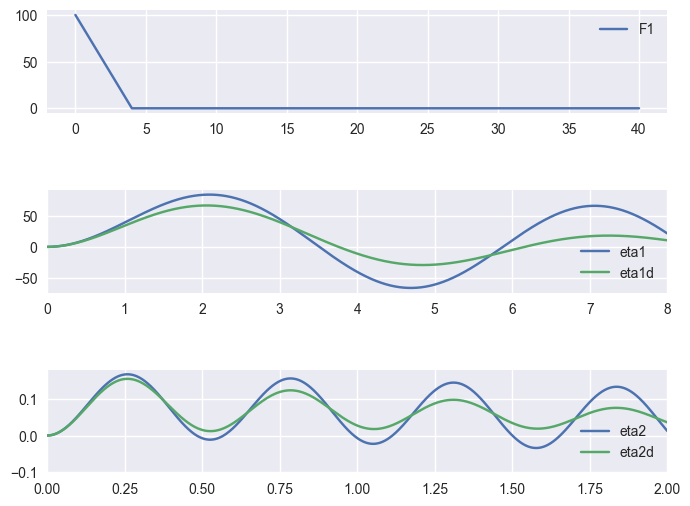

In [24]:
#plot eta1, eta2 
plt.figure(figsize=(8,6))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0], label='F1')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(3,1,2)
plt.xlim(0, 8)
plt.plot(t, eta1[:len(t)], label='eta1')
plt.plot(t, eta1d[:len(t)], label='eta1d')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(3,1,3)
plt.xlim(0, 2)
plt.plot(t, eta2[:len(t)] ,label='eta2')
plt.plot(t, eta2d[:len(t)], label='eta2d')
plt.legend()

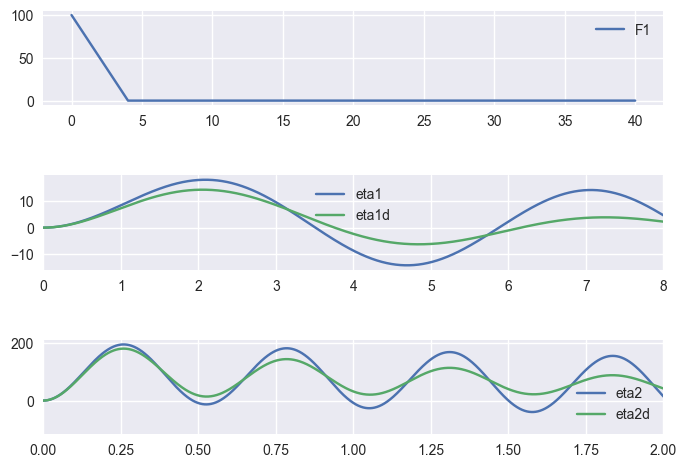

In [39]:
#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0], label='F1')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(3,1,2)
plt.xlim(0, 8)
plt.plot(t, eta1[:len(t)] * omega1**2, label='eta1')
plt.plot(t, eta1d[:len(t)] * omega1**2, label='eta1d')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(3,1,3)
plt.xlim(0, 2)
plt.plot(t, eta2[:len(t)]  * omega2**2,label='eta2')
plt.plot(t, eta2d[:len(t)] * omega2**2, label='eta2d')
plt.legend()

### Iz modalnega prostora nazaj v realnega

$$\{x(t)\}=[\Phi] \cdot \{\xi(t)\}$$

In [34]:
print(eigenvectors)
print("  ")
print(eta[:,50:60])
print("  ")
print(etaD[:,50:60])

[[ 0.12338504  0.99989906]
 [ 0.99235887 -0.01420829]]
  
[[0.01566152 0.01628637 0.01692338 0.01757253 0.01823383 0.01890727
  0.01959285 0.02029056 0.02100039 0.02172235]
 [0.12315517 0.12791398 0.13275325 0.13767225 0.14267026 0.14774654
  0.15290035 0.15813092 0.16343748 0.16881924]]
  
[[0.01538125 0.01599281 0.01661614 0.01725123 0.01789808 0.01855667
  0.01922699 0.01990904 0.0206028  0.02130827]
 [0.12057659 0.12518725 0.12987307 0.13463328 0.13946707 0.14437365
  0.14935221 0.15440191 0.15952195 0.16471147]]


In [35]:
# plt.figure(figsize=(6,10))
# plt.subplot(3,1,1)
# plt.plot(t, etaD[0,:len(t)], label='etaD1')
# plt.plot(t, etaD[1,:len(t)], color=colors[6], linestyle='--', label='etaD2')
# plt.legend()
# x1D = eigenvectors[0,0] * etaD[0,:] + eigenvectors[0,1] * etaD[1,:]
# x2D = eigenvectors[1,0] * etaD[0,:] + eigenvectors[1,1] * etaD[1,:]
# plt.subplots_adjust(hspace=0.25)
# plt.subplot(3,1,2)
# plt.plot(t, x1D[:len(t)])
# plt.plot(t, x2D[:len(t)], color=colors[6], linestyle='--', label='etaD2')
# plt.subplots_adjust(hspace=0.25)
# plt.subplot(3,1,3)
# plt.title("Razlika med x2 in x1")
# plt.plot(t, (x1D - x2D)[:len(t)])

# eigenvectors

In [36]:
eigenvectors[:,0] 

array([0.12338504, 0.99235887])

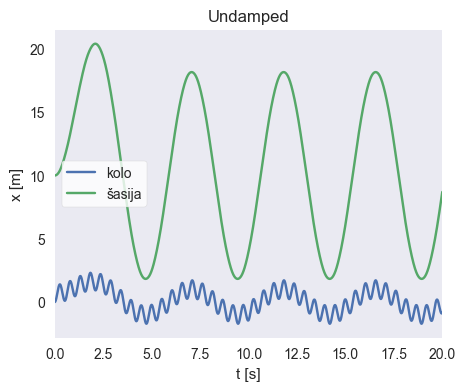

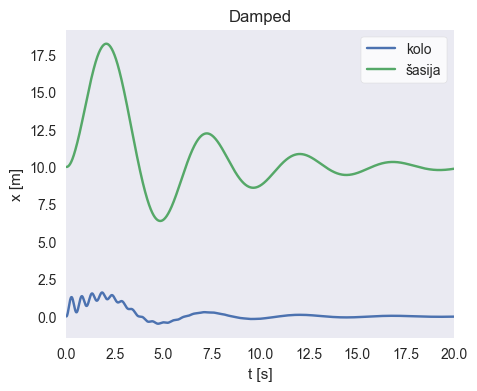

In [38]:
v_pom = 10
x1_1 = eigenvectors[:,0] @ eta
x1_2 = eigenvectors[:,1] @ eta

x1_1D = eigenvectors[:,0] @ etaD
x1_2D = eigenvectors[:,1] @ etaD

#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title("Undamped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1[:len(t)])
plt.plot(t, v_pom + x1_2[:len(t)])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')

#plot x1_1D and x1_2D
plt.figure(figsize=(5,4))
plt.title("Damped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1D[:len(t)])
plt.plot(t, v_pom + x1_2D[:len(t)])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
